# Theory

Before moving on to the actual coding, one thing that makes data scientists so in-demand is knowing when and why to use different algorithms. Because of this, let's check that you really understand what you're doing! :)

1. What is the difference between supervised learning and unsupervised learning? In addition to your explanation, give two fictional examples for each (4 in total) that clearly explain the difference.

(Insert answer here)  
In supervised learning our model learns on a dataset containing the target variable (y), the variable we would like to predict. Using the features (all the other columns but y), it learns where the y values stand. y can be categorical. in that case we will use Classifiers. If y is continuous we will use a Regressor.  
Example of classification problem: We want to predict whether a customer will churn or not. Based on available data where we have the outcomes (churn and not churn), our Classifier learns from it and will use this knowledge to predict whether a customer will churn or not.  
Example of a regression problem: We want to predict the delivery time from a logisitc dataset. We have a set of data with many different features (such as location of the warehouse and of the point of delivery, date and time of pick-up and drop off etc.) and for each sample the delivery time. The Regressor will learn from this set of data and will approximate new delivery time based on what it learnt.  

In unsupervised learning, the model doesn't have the target variable y. It only has the features. We have seen in class 2 different kind of unsupervised machine learning: Clustering and Dimension Reduction.  
Clusters categorize the data into clusters. However, we need to tell them how many clusters we would like.  
Dimension reduction is used when we have a lot of features. Here, a feature (or column) is defined as a dimension. In a multidimensional (>4) case it's impossible for the human eye to grasp any information. A DR will compact these dimensions to the desired number of dimensions. PCA (Principal Component Analysis) is a DR. If we run it without specifying the number of components we want to compact our dimensions to, we can use the explained_variance_ratio_ attribute to see the number of principal components that would explained the majority of the total variance. Then, we can use that to define the number of components we can compact our data to without loosing too many informations.  
Example of a clustering model: KMeans. We can use KMeans when we want to divide our data into a determined number of clusters. For example, we have a set of data describing penguins features and we know there are three species but we do not know which penguin is what species.  
Example for DR: We have a set of data with a tremendous number of features (dimensions) and we cannot therefore find easily the number of categories we can divide our data. We could then first use PCA (first without giving it the number of components) to find to how many principal components we can compact our data to. Once transformed, we can visualise in 2 or 3 (4 if we use time, hence video) dimensions our transformed data and see if we can visualise the categories. If we do, we can then run for example a KMeans and divide our data to the number of clusters we have visualised after reducing our dimensions. It is important to note that at that stage our features (or columns) have no human interpretation as they have been transformed by PCA.

2. What is the difference between regression and classification? Similarly, give two examples of each (4 in total).

(Insert answer here)  
See above.

3. Could you explain the bias and variance tradeoff? What are some ways to counteract high bias and/or high variance?

(Insert answer here)  
Bias and variance move in opposite direction.  
The bias tells how much the model y (y^) is different from the real y.  
The variance tells how much the model is incapable to predict. In the case of high variance, it trains so well that its prediction from a new set of data will be super different from the real data (high variance). We say then that the model is overfitting.  
A model with a high bias doesn't train well. It will predict as poorly on both the training set and test set. We say that the model is underfitting. In that case we have a low score and low variance.
A model with a high variance on the opposite will learn too well and won't be able to predict well on a new dataset. A model with a high variance is overfitting. We also say that the model is too complex (high complexity).
The best model (and therefore the best complexity) will be a balance between low bias and low variance.  
Ways to counteract high variance:  
If our model is overfitting, we could reduce its complexity through feature engineering (for example, removing features that are not important and bring noise. A way to see if a feature is redundant is to look at the correlation between them.). If we know how we can regularize the model (for example for linear regression we can use Ridge (f + sum(coef²)*alpha) or Lasso (f + sum(|coef|))).  
Ways tou counteract high bias:  
We could increase our sample size. We could also increase the complexity by adding more features (if possible).



4. Why do you want to split your dataset into a training and testing split? (Hint: think about what the goal of using machine learning algorithms is in the first place). Is there a method out there that increases the generalizability of your results?

(Insert answer here)  
We need to divide our dataset into training and test sets so we can test how well our model learns. 
However, only doing this won't help us determine if our model is overfitting. One way is to divide our train set to k folds and use each fold as a test set. By doing this, we have k scores and we can by this evaluate the variability. If we have a good or high score but also a high variability between scores, we can conclude that our model is overfitting (without it having seen our test set which is the final verification of the good functionality of our model).  
Technically, we will use the class KFold (will divide our train set to k folds or subsets) and apply this on the cross_val_score method. cross_val_score returns k score values.

5. What are 2 metrics for classifcation? What are 2 metrics for regression? Particularly for the classification metrics, could you explain what these mean by potentially giving real examples?  

The default for classification in scikit-learn is accuracy. accuracy = (TP + TN)/N  N=total number of samples, TP: True Positives, TN: True Negatives. We can notably use it when our classes are balanced (aprx same number of samples inside each class).  
f1 (harmonic mean of recall and precision) is useful when we have a class imbalance and we give equal importance to both FN (for recall = TP/(TP+FN)) and FP (for precision=TP/(TP+FP)).  

For regression we can cite the MAE (Mean Absolute Error). It can be used if we do not pay too much importance to the outliers. It is easy to interpret as it has the same unit as y (target variable).  
MSE (Mean Square Error): However, in general we report the RMSE (Root Mean Squared Error) which is easier because it has the same unit as y. MSE is used when we pay attention to the outliers. Since we are squaring the residuals, outliers will have a higher weight. If the MSE (or rmse) is high, that suggests that our model has difficulty to predict accurately extreme y values. If they are important for the purpose of our project, then MSE is a good metric to use to evaluate the performance of our model.

In [1]:
import pandas as pd
import numpy as np

# Classification
Here, we're going to be trying to predict whether or not a student was placed or not placed within a particular campus based off several columns. To be specific, we will be trying to predict the column "status" based off of all other columns within the dataset.

Note: This is an already slightly preproccessed dataset. If you're interested in the meaning of the columns, please go to https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

In [2]:
data = pd.read_csv("data/Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# Delete the sl_no column and the salary column.
data.drop(["sl_no","salary"], axis=1, inplace=True)

In [5]:
data["gender"].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [6]:
# Transform the categorical columns into one-hot encoded columns.
def my_bool_function(df, col_name,category):
    """Returns a bool 1s and 0s for categorical columns containing only 2 categories.
    Args:
        df (DataFrame): Table you want to work on.
        col_name (string): name of the column you want to modify.
        category (string): name of 1 of the 2 categories present in col_name.
    Note:
        category must be the category you want to impute the value 1 (or True).
    """
    col = np.where(df[col_name] == category,1,0)
    return col

data["gender_bool"] = my_bool_function(data,"gender","F")
data["gender_bool"].value_counts()

gender_bool
0    139
1     76
Name: count, dtype: int64

In [7]:
data["workex"].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [8]:
data["workex_bool"] = my_bool_function(data,"workex","Yes")
data["workex_bool"].value_counts()

workex_bool
0    141
1     74
Name: count, dtype: int64

In [9]:
data["hsc_b"].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [10]:
data["hsc_b_bool"] = my_bool_function(data,"hsc_b","Central")

In [11]:
data["ssc_b"].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [12]:
data["ssc_b_bool"] = my_bool_function(data,"ssc_b","Central")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  gender_bool     215 non-null    int32  
 14  workex_bool     215 non-null    int32  
 15  hsc_b_bool      215 non-null    int32  
 16  ssc_b_bool      215 non-null    int32  
dtypes: float64(5), int32(4), object(8)


In [14]:
data.drop(["gender","workex","hsc_b","ssc_b"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ssc_p           215 non-null    float64
 1   hsc_p           215 non-null    float64
 2   hsc_s           215 non-null    object 
 3   degree_p        215 non-null    float64
 4   degree_t        215 non-null    object 
 5   etest_p         215 non-null    float64
 6   specialisation  215 non-null    object 
 7   mba_p           215 non-null    float64
 8   status          215 non-null    object 
 9   gender_bool     215 non-null    int32  
 10  workex_bool     215 non-null    int32  
 11  hsc_b_bool      215 non-null    int32  
 12  ssc_b_bool      215 non-null    int32  
dtypes: float64(5), int32(4), object(4)
memory usage: 18.6+ KB


In [15]:
data["hsc_s"].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [16]:
data["specialisation"].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [17]:
data["specialisation_bool"] = my_bool_function(data,"specialisation","Mkt&Fin")

In [18]:
data.drop("specialisation", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_p                215 non-null    float64
 1   hsc_p                215 non-null    float64
 2   hsc_s                215 non-null    object 
 3   degree_p             215 non-null    float64
 4   degree_t             215 non-null    object 
 5   etest_p              215 non-null    float64
 6   mba_p                215 non-null    float64
 7   status               215 non-null    object 
 8   gender_bool          215 non-null    int32  
 9   workex_bool          215 non-null    int32  
 10  hsc_b_bool           215 non-null    int32  
 11  ssc_b_bool           215 non-null    int32  
 12  specialisation_bool  215 non-null    int32  
dtypes: float64(5), int32(5), object(3)
memory usage: 17.8+ KB


In [19]:
# Transform the status into either 0 or 1.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["status_LabEncod"] = le.fit_transform(data["status"])
print(data[["status","status_LabEncod"]].head())

       status  status_LabEncod
0      Placed                1
1      Placed                1
2      Placed                1
3  Not Placed                0
4      Placed                1


In [20]:
data.drop("status", axis=1, inplace=True)
dummies = pd.get_dummies(data, drop_first=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_p                215 non-null    float64
 1   hsc_p                215 non-null    float64
 2   degree_p             215 non-null    float64
 3   etest_p              215 non-null    float64
 4   mba_p                215 non-null    float64
 5   gender_bool          215 non-null    int32  
 6   workex_bool          215 non-null    int32  
 7   hsc_b_bool           215 non-null    int32  
 8   ssc_b_bool           215 non-null    int32  
 9   specialisation_bool  215 non-null    int32  
 10  status_LabEncod      215 non-null    int32  
 11  hsc_s_Commerce       215 non-null    bool   
 12  hsc_s_Science        215 non-null    bool   
 13  degree_t_Others      215 non-null    bool   
 14  degree_t_Sci&Tech    215 non-null    bool   
dtypes: bool(4), float64(5), int32(6)
memory 

In [21]:
dummies["status_LabEncod"].value_counts(normalize=True)

status_LabEncod
1    0.688372
0    0.311628
Name: proportion, dtype: float64

In [22]:
# Split your dataset into a training and testing set using an 80/20 split.
    # NOTE: Please use a random_state of 42! This helps me reproduce your results!

from sklearn.model_selection import train_test_split

X = dummies.drop("status_LabEncod", axis=1)
y = dummies["status_LabEncod"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [23]:
# We learned 3 different algorithms in order to predict a binary target variable.
# Use these 3 algorithms with their default hyperparameters in order to get predictions for "status".
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler #I am using this because I got a convergenceWarning message for logR

StdSc = StandardScaler()
X_train_scaled = StdSc.fit_transform(X_train)

LogR = LogisticRegression()
KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier() 

LogR.fit(X_train_scaled,y_train)
KNN.fit(X_train,y_train)
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

For this dataset, what do you think is the best metric to use and why?  

We have here a class imbalance (only 31% of the status are "Not Placed"). Hence, the default metric accuracy would not be the best choice here.  
Furthermore, since it's like an evaluation (if I understood correctly), neither FP (for precision), nor FN (for recall) would be more important than the other. Hence, I could take f1 which is the harmonic mean of recall and precision.
Another metric that I could take is the roc-auc score, which is the area under the curve of the plot TP rate (TPR) against FP rate (FPR). It tells us how well the model is capable to disciminate between positive and negative outcomes, regardless of their relative frequencies. TPR = recall = TP/(TP + FN); FPR = FP/(FP + TN). The curve is drawn using different threshold (by default in the model the threshold is 0.5).

In [24]:
# Using the metric that you decided upon, what is the score for each of the three models?
from sklearn.metrics import f1_score, roc_auc_score

models = {"KNN":KNN, "Decision Tree":DTC}

for name,model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)
    print(f"{name} f1: {f1} \n{name} roc_auc: {roc_auc}")

KNN f1: 0.8923076923076924 
KNN roc_auc: 0.7525641025641026
Decision Tree f1: 0.7936507936507936 
Decision Tree roc_auc: 0.608974358974359


In [25]:
X_test_scaled = StdSc.transform(X_test)
y_predLogReg = LogR.predict(X_test_scaled)
f1_LogR = f1_score(y_test,y_predLogReg)
roc_auc_LogR = roc_auc_score(y_test,y_predLogReg)
print(f"Logistic Regression f1: {f1_LogR} \nLogistic Regression roc_auc: {roc_auc_LogR}")

Logistic Regression f1: 0.896551724137931 
Logistic Regression roc_auc: 0.8564102564102564


Logistic Regression would be the best to use. both its f1 and roc_auc scores are higher than the others. A high f1 means that both FN and FP are realtively low and the roc_auc tells us that it correctly ranks the y in 85.6% of the time.

In [26]:
# Using 5-fold cross validation, compute the averaged score for each of the three models.
# Reference this for the scoring hyperparameter: https://scikit-learn.org/stable/modules/model_evaluation.html
# Note: When defining the KFold, please use a random state of 42!
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

logR2 = LogisticRegression()
KNN2 = KNeighborsClassifier()
DTC2 = DecisionTreeClassifier()
models2 = {"KNN":KNN2,"Decision Tree":DTC2}

In [27]:
results = []
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for model in models2.values():
    cv_results = cross_val_score(model,X_train, y_train, cv=kf, scoring="f1")
    results.append(cv_results)


[array([0.92307692, 0.94915254, 0.94736842, 0.85106383, 0.8       ]), array([0.88888889, 0.90909091, 0.82352941, 0.79069767, 0.7       ]), array([0.92592593, 0.92857143, 0.94545455, 0.87804878, 0.83333333])]


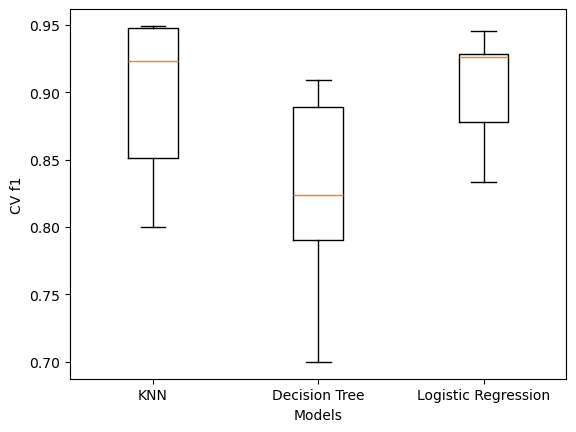

In [28]:

cv_results = cross_val_score(logR2,X_train_scaled, y_train, cv=kf, scoring="f1")

results.append(cv_results)
print(results)
Class_models = {"KNN":KNN2, "Decision Tree":DTC2, "Logistic Regression":logR2}
plt.boxplot(results, labels=Class_models.keys())
plt.ylabel(f"CV f1")
plt.xlabel("Models")
plt.show()

In [29]:
for scores,model in zip(results,Class_models.keys()):
    average = np.mean(scores)
    print(f"{model} f1_mean: {average}")

KNN f1_mean: 0.894132343257934
Decision Tree f1_mean: 0.8224413768326218
Logistic Regression f1_mean: 0.9022668027546075


We can see on the graph that although the f1 score of KNN is second best after Logistic Regression, there is a higher variability than with Logistic regression suggesting that the model has the tendency to overfit.  

To conclude, for this dataset the logistic regression is good model. 

# Regression
Within this dataset, we're going to try to predict the medical charges of a patient based on 6 columns: age, sex, bmi, the number of children, whether or not someone is a smoker and the region of the patient. 

Note: The original dataset was found here: https://www.kaggle.com/mirichoi0218/insurance

In [30]:
# Load in the medical insurance cost dataset.
data_2 = pd.read_csv("data/insurance.csv")
data_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# Transform the categorical variables into one-hot encoded variables.
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
data_2["sex_bool"] = my_bool_function(data_2,"sex", "female")
data_2["smoker_bool"] = my_bool_function(data_2,"smoker","yes")
data_2.drop(["sex","smoker"], axis=1, inplace=True)
dummies_2 = pd.get_dummies(data_2, drop_first=True)
dummies_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_bool          1338 non-null   int32  
 5   smoker_bool       1338 non-null   int32  
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int32(2), int64(2)
memory usage: 56.3 KB


In [33]:
# Split your dataset into a training and testing set using an 80/20 split.
    # NOTE: Please use a random_state of 42! This helps me reproduce your results!

X_2 = dummies_2.drop("charges", axis=1)
y_2 = dummies_2["charges"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_2,y_2, test_size=0.2, random_state=42)

In [34]:
# Using Linear Regression, a Decision Tree, and a Random Forest, predict charges.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LinReg = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor(n_estimators=200)

models_R = {"Linear Regression":LinReg, "Decision Tree":DTR, "Random Forest":RFR}

charges = pd.DataFrame(y_test2, columns=["Real charges"])
for name,model in models_R.items():
    model.fit(X_train2,y_train2)
    charges[name] = model.predict(X_test2)

y_test2.to_list()
charges["Real charges"] = [x for x in y_test2]
charges.head()


,Real charges,Linear Regression,Decision Tree,Random Forest
0,9095.06825,8969.550274,8615.30000,9685.290390
1,5272.17580,7068.747443,4571.41305,5438.817799
2,29330.98315,36858.410912,28950.46920,28362.858876
3,9301.89355,9454.678501,9225.25640,11615.228792
4,33750.29180,26973.173457,33732.68670,34707.297503


Assume that we're about to present to a stakeholders and business people who do not quite understand data science.
If this is the case, which metric would be the best to use and why?  

R² is the default metric for the regressors in sklearn. However, it's not an easy one to explain. It can be translated as being the proportion of the variance in the target variable that is predictable from the features.  

MSE (Mean Squared Error) = mean((y-y^)²). Bigger is the residual (the distance between y and y^), much bigger will MSE be. Hence, this metric take huge importance on the outliers. However, if this metric is used we need to square root it so we can understand better the performance of the model (to get to the same unit instead of presenting the unit²).

MAE (Mean Absolute Error) = mean(|y-y^|). Here the outliers take less importance as they are not squared.  


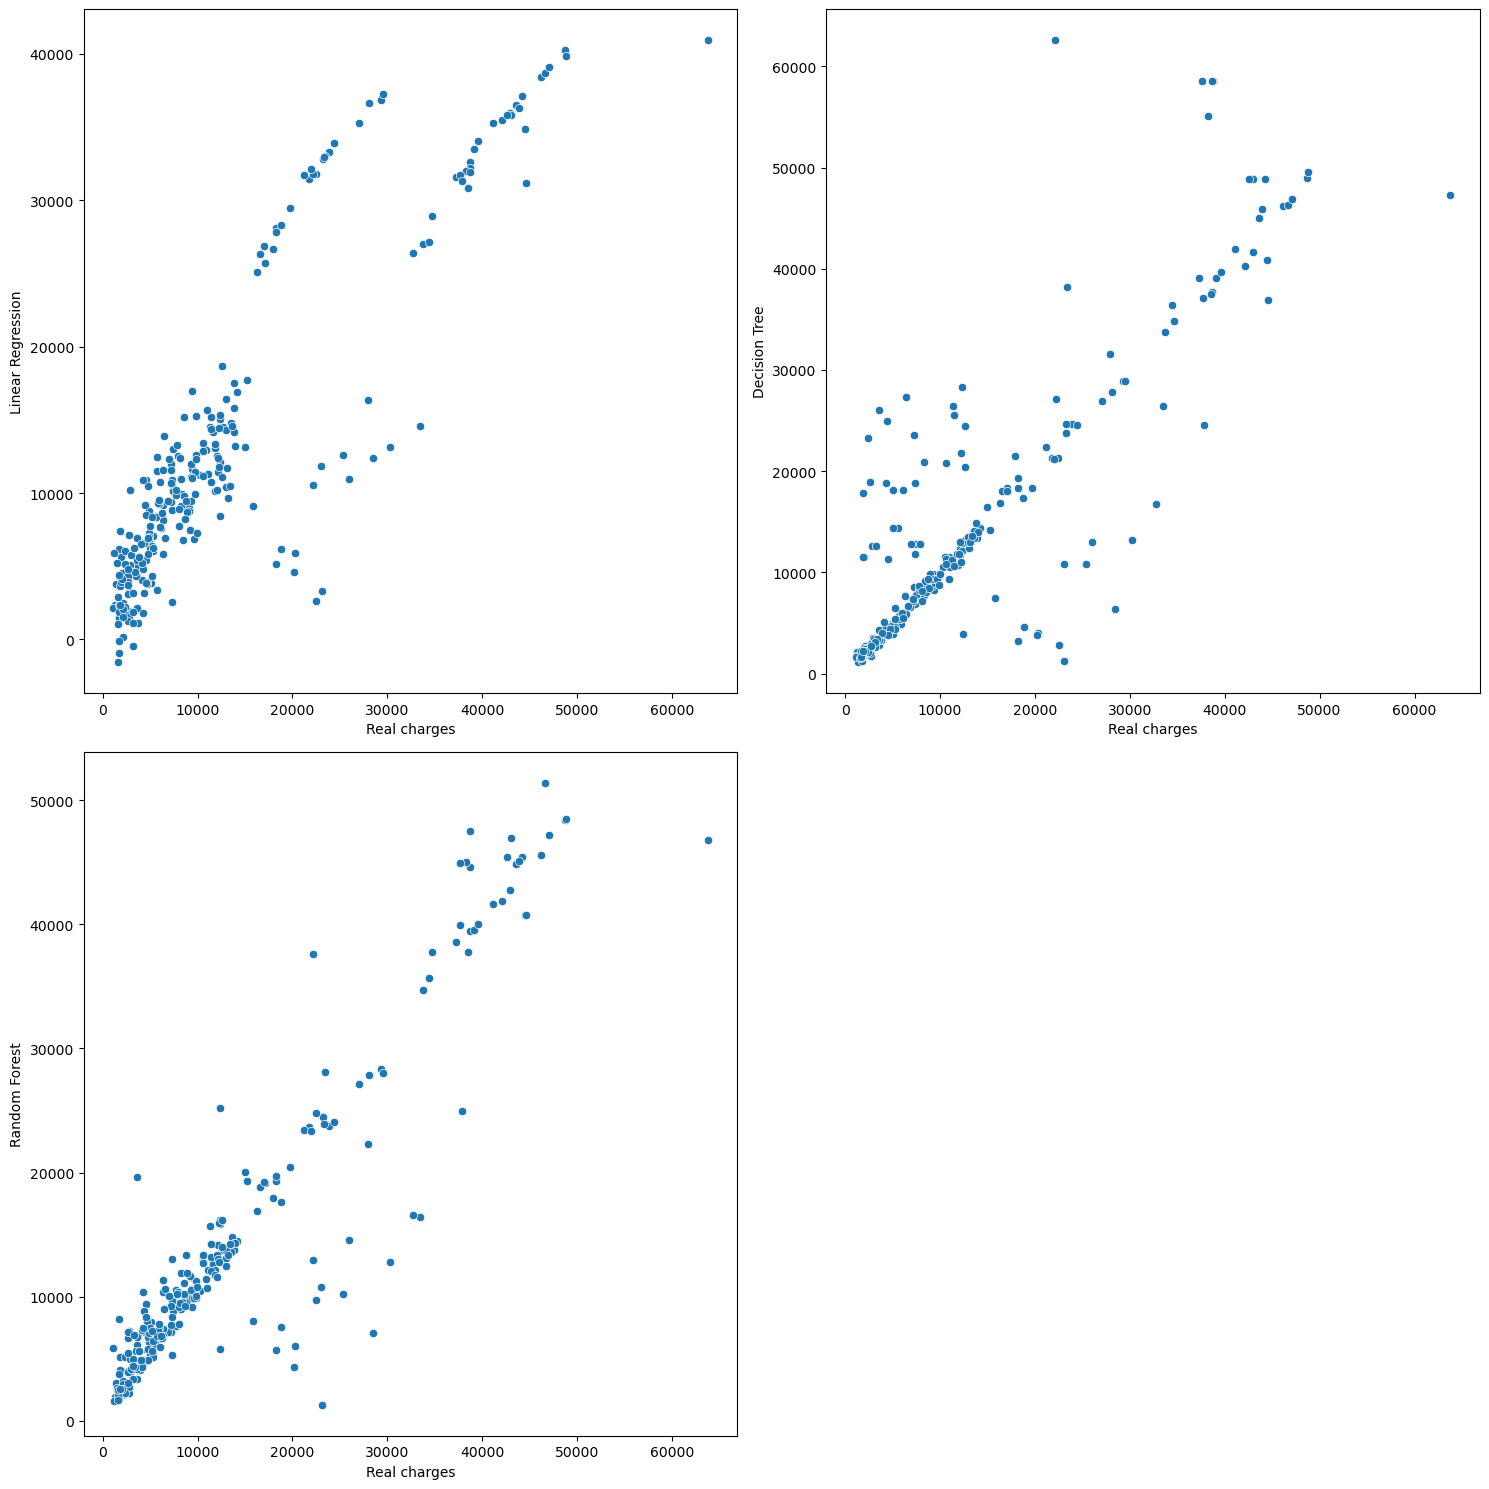

In [35]:
import seaborn as sns
fig,axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(x="Real charges", y="Linear Regression", data=charges, ax=axes[0,0])
sns.scatterplot(x="Real charges", y="Decision Tree", data=charges, ax=axes[0,1])
sns.scatterplot(x="Real charges", y="Random Forest", data=charges, ax=axes[1,0])
fig.delaxes(axes[1,1])
plt.tight_layout()
plt.show()

In [36]:
# Using your decided-upon metric, calculate the score for each of these algorithms.
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

rmse_Linear_Reg = MSE(charges["Real charges"],charges["Linear Regression"])**(1/2)
rmse_DTR = MSE(charges["Real charges"],charges["Decision Tree"])**(1/2)
rmse_RFR = MSE(charges["Real charges"],charges["Random Forest"])**(1/2)

mae_Linear_Reg = MAE(charges["Real charges"],charges["Linear Regression"])
mae_DTR = MAE(charges["Real charges"],charges["Decision Tree"])
mae_RFR = MAE(charges["Real charges"],charges["Random Forest"])

print(f"rmse Linear Regression: {rmse_Linear_Reg} \nrmse Decision Tree: {rmse_DTR} \nrmse Random Forest: {rmse_RFR}")
print(f"mae Linear Regression: {mae_Linear_Reg} \nmae Decision Tree: {mae_DTR} \nmae Random Forest: {mae_RFR}")


rmse Linear Regression: 5796.2846592762735 
rmse Decision Tree: 6927.27970838632 
rmse Random Forest: 4629.438519929373
mae Linear Regression: 4181.1944737536505 
mae Decision Tree: 3326.5816854701498 
mae Random Forest: 2587.935152204526


For this dataset I would say both rmse and mae are valid. However, they do not reflect the direction where the model has most difficulties. As an insurance company I would say it's ok to predict higher especially for conditions where we expect high charges.  
On the graph, while random forest is very good in general in predicting, most of the values outside the line are under-predicting while for the decision tree we see outliers on both side of the line. Hence, increasing the number of the same decision tree (but fed with with slightly different sets of the dataset) helps the model to not overestimate the charges but is less performant in not underestimate it. 


In [37]:
# For the linear regression model, print out the intercept and the coefficients.
coef_intercept = pd.DataFrame({"intercept":LinReg.intercept_, "coefficient":LinReg.coef_}, index=X_2.columns)
coef_intercept.sort_values("coefficient", ascending=False, inplace=True)
coef_intercept

,intercept,coefficient
smoker_bool,-11949.810742,23651.128856
children,-11949.810742,425.278784
bmi,-11949.810742,337.092552
age,-11949.810742,256.975706
sex_bool,-11949.810742,18.591692
region_northwest,-11949.810742,-370.677326
region_southeast,-11949.810742,-657.864297
region_southwest,-11949.810742,-809.799354


In [38]:
# For the random forest model, print out the feature importance for each of the variables.
RFR_feature_imp = pd.DataFrame({"Feature":X_2.columns, "Feature importance":RFR.feature_importances_})
RFR_feature_imp.sort_values("Feature importance", ascending=False, inplace=True)
RFR_feature_imp

,Feature,Feature importance
4,smoker_bool,0.610123
1,bmi,0.214114
0,age,0.134952
2,children,0.019510
3,sex_bool,0.006524
5,region_northwest,0.005424
6,region_southeast,0.005065
7,region_southwest,0.004289


# Dimensionality Reduction and Clustering
For the dimensionality reduction and clustering task, we're going to first reduce the dimensions using PCA and then cluster the first two principal components into 3 different clusters using the K-Means algorithm.

Note: The dataset was originally loaded here: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

In [39]:
# Load in the dataset.
data3 = pd.read_csv("data/marketing_campaign_preprocessed.csv")
data3

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2213,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2214,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3


In [40]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [41]:
# Turn the categorical columns into one-hot encoded columns.
dummies3 = pd.get_dummies(data3, drop_first=True)
dummies3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2216 non-null   float64
 1   Kidhome                  2216 non-null   int64  
 2   Teenhome                 2216 non-null   int64  
 3   Recency                  2216 non-null   int64  
 4   MntWines                 2216 non-null   int64  
 5   MntFruits                2216 non-null   int64  
 6   MntMeatProducts          2216 non-null   int64  
 7   MntFishProducts          2216 non-null   int64  
 8   MntSweetProducts         2216 non-null   int64  
 9   MntGoldProds             2216 non-null   int64  
 10  NumDealsPurchases        2216 non-null   int64  
 11  NumWebPurchases          2216 non-null   int64  
 12  NumCatalogPurchases      2216 non-null   int64  
 13  NumStorePurchases        2216 non-null   int64  
 14  NumWebVisitsMonth       

In [42]:
# Because there are a lot of different columns, let's use PCA in order to reduce the number of dimensions to 3.
# In order to properly use PCA, we need to standardize/normalize every single one of these columns. 

# The code is given here:

scaler = StandardScaler()
scaler.fit(dummies3)
scaled_data = pd.DataFrame(scaler.transform(dummies3),columns= dummies3.columns)

Above it is said 3 but then under we are asked to use 2, so I used 2. However (see later), 2 principal components are not enough to explain the total variance of the data.  
Nonetheless, I kept it with 2.

In [43]:
# Use PCA to transform these columns into 2 different principal components.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
dummies_pcaTrsf = pca.transform(scaled_data)
dummies_pcaTrsf.shape

(2216, 2)

In [44]:
# Do these two principal components do a good job in explaining the total variance of the dataset?
comp_var_ratio = pca.explained_variance_ratio_

np.sum(comp_var_ratio)

0.31094178952491236

These 2 principal components only explain 31% of the total variance. So no, they are not doing a good job. We are loosing too many informations. 

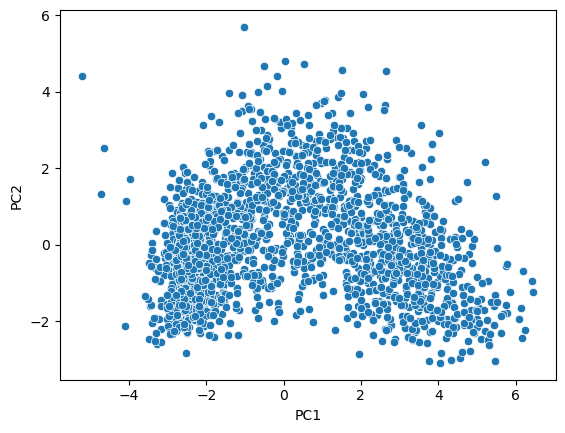

In [45]:
# Visualize the two different principal components in the form of a scatter plot.
# Note: If you were unable to do the previous PCA steps, feel free to use "data/pca_components.csv"!!!
principal_components = pd.DataFrame({"PC1":dummies_pcaTrsf[:,0], "PC2":dummies_pcaTrsf[:,1]})

sns.scatterplot(x="PC1", y="PC2", data=principal_components)
plt.show()

In [46]:
# Using K-Means clustering, cluster the two principal components into 3 different clusters.
    # NOTE: Please use a random_state of 42! This helps me reproduce your results!

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)
clusters = kmeans.predict(principal_components)

[[-2.18479806 -0.50910801]
 [ 3.28939049 -0.7040965 ]
 [ 0.43402365  1.63238061]]


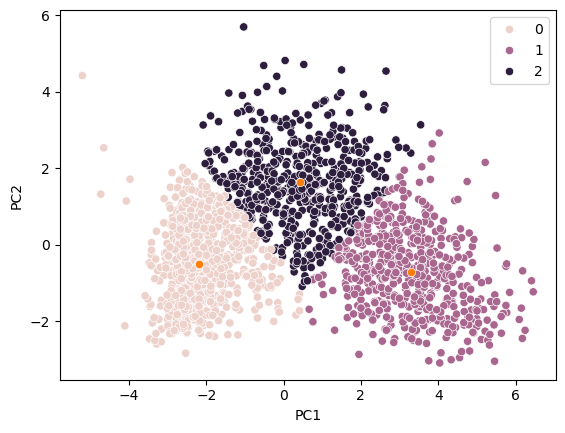

In [54]:
# View the cluster centers.
clusters_centers = kmeans.cluster_centers_
print(clusters_centers)
principal_components["cluster"] = clusters
sns.scatterplot(x="PC1", y="PC2", data=principal_components, hue="cluster")
sns.scatterplot(x=clusters_centers[:,0], y=clusters_centers[:,1])
plt.show()

In [48]:
# Assign the cluster predictions to a variable called "cluster_predictions"
# see above

In [49]:
# For these 3 clusters, plot a scatter plot with the different clusters in different hues.
# Note: If you make a dataframe with the columns "PC1", "PC2", and cluster_predictions, you can use sns.scatterplot()
# and just use x = "PC1", y="PC2", and hue="cluster_predictions"
# done see graph above


# Extra Challenges

a. Create your own function called "my_root_mean_squared" which takes in two parameters: y_actual and y_pred. Both of these parameters should either be pandas Series or lists and should contain numerical values. Return the root mean squared error using the following function and without using any other libraries other than numpy.

$$ rmse = sqrt[\sum_{i=1}^{n}\frac{1}{n}(\hat{y}_i - y_i)^2]$$

In [50]:
def my_root_mean_squared(y_test,y_pred):
    """Returns the rmse of your model.
    Args:
        y_test (pandas Serie or list): n values of real y.
        y_pred (pandas Series or list): same n values of your predictions y.
    """
    residual_squared = (y_pred - y_test)**2
    mse = np.mean(residual_squared)
    rmse = np.sqrt(mse)
    return rmse

my_root_mean_squared(charges["Real charges"],charges["Random Forest"])

4629.438519929373

b. Create your own function called "my_recall" which takes in two parameters: y_actual and y_pred. Both of these parameters should be binary categorical variables in the form of a Pandas Series or a list. Return the recall using the following function:

$$ recall = \frac{TP}{TP + FN}$$

such that <i>TP</i> are the true positives and <i>FN</i> are the false negatives. You can use the confusion matrix class in Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [51]:
def my_recall(y_actual,y_pred):
    """Returns the recall (or sensitivity) of your model based on the actual values of y 
    and their predictive counterparts.
    Args:
        y_actual (Pandas Series or a list): n values of real y.
        y_pred (pandas Series or list): same n values of your predictions y.
    Note: the y must be a list of 0s and 1s.
    """
    TP = []
    for y,y_hat in zip(y_actual,y_pred):
        if y == y_hat and y == 1:
            TP.append(1)
        else:
            TP.append(0)
    FN = []
    for y,y_hat in zip(y_actual,y_pred):
        if y_hat == 0 and y == 1:
            FN.append(1)
        else:
            FN.append(0)
    recall = np.sum(TP)/(np.sum(TP)+np.sum(FN))
    return recall

my_recall(y_test, y_predLogReg)


0.8666666666666667

c. Using the regression dataset that we preprocessed previously, use only "age" in order to predict "charges" using a training/testing split of 80/20. Print out the intercept value and the coefficient estimate for age. Now that we have these two values as a comparison, can you use the training set in order to manually calculate these $\beta$ values? You can use the NumPy library.

Note that $\beta_0$ represents the intercept whereas $\beta_1$ represents the coefficient estimate for age.

Here are the following formulas:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_{1}\bar{x}$$

$$ \hat{\beta}_{1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y_i})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$


In [52]:
print(coef_intercept.loc["age"])
mean_age = X_train2["age"].mean()
mean_charges = np.mean(y_train2)

residual_age = X_train2["age"] - mean_age
residual_charge = y_train2 - mean_charges

num_beta1 = np.sum(residual_age * residual_charge)

resid_age_squared = np.square(residual_age)
denom_beta1 = np.sum(resid_age_squared)

beta1 = num_beta1/denom_beta1

beta1

intercept     -11949.810742
coefficient      256.975706
Name: age, dtype: float64


240.5965597887748

In [53]:
beta0 = mean_charges - beta1*mean_age
beta0

3876.9286841916946